# Polynomial Linear Regression

#### The attributes/inputs are transformed into polynomial features

### Importing libraries

In [1]:
from numpy  import *
from pandas import *

from sklearn.metrics         import mean_absolute_error
from sklearn.datasets        import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import Ridge, LinearRegression, Lasso
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import PolynomialFeatures

import seaborn as sns
import matplotlib.pyplot as plt


### Utility Functions

In [2]:
intercept = lambda X : column_stack((ones(X.shape[0]), X))

def fit(X, y):
    X = intercept(X)
    return (linalg.inv(X.T @ X) @ X.T @ y).reshape(1, -1)

# OLS with L2 Regularization
def fit_L2(X, y, λ):
    X = intercept(X)
    return (linalg.inv(X.T @ X + λ) @ X.T @ y).reshape(1, -1)

def predict(X, Θ):
    X = intercept(X)
    return (fromiter((Θ @ x for x in X), dtype=float)).reshape(-1, 1)

def make_poly(X, degree):
    return column_stack(tuple([X]+[X**i for i in range(2, degree + 1)]))


### Desc of Data Used

In [3]:
# print(load_diabetes().DESCR)

### Loading Data


In [4]:
X, y = load_diabetes(return_X_y=True)
X = X[:, 2] # For Demostration Purposes I'll only use BMI

# Model Fitters need a Vector rather than a 1D array
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

m = 30
xx, yy = X[:m], y[:m]

### Scatter Plot of Data

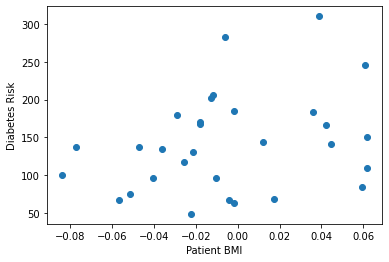

In [5]:
fig, ax = plt.subplots()
ax.axes.set_ylabel("Diabetes Risk")
ax.axes.set_xlabel("Patient BMI")
ax.scatter(xx, yy, label="Training Set")

### Plotting the Regression Line

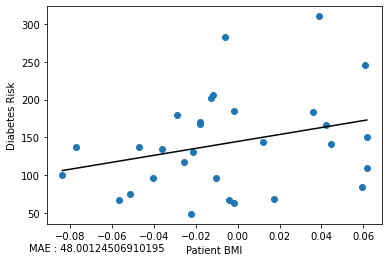

In [6]:
Θ = fit(xx, yy)
pred = predict(xx, Θ)

ax.text(-0.1, 0, f"MAE : {mean_absolute_error(yy, pred)}", color="black")

x1, y1, x2, y2 = min(xx), pred[argmin(xx)], max(xx), pred[argmax(xx)]
ax.plot([x1, x2], [y1, y2], color="black", label="Regression Line")
fig

### Non Linear Transformation

In [7]:
xx = make_poly(X[:m], 20)

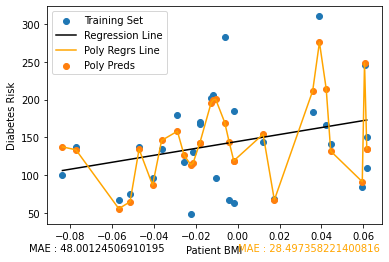

In [8]:
Θ = fit(xx, yy)
pred = predict(xx, Θ)

ax.plot(sorted(xx[:, 0]), pred[tuple([argsort(xx[:, 0])])], color="orange", label="Poly Regrs Line")
ax.scatter(xx[:, 0], pred, label="Poly Preds")
ax.text(0, 0, f"MAE : {mean_absolute_error(yy, pred)}", color="orange")
ax.legend()
fig

### Sklearn Implementation with Regularization

In [9]:
xt, xv, yt, yv = train_test_split(X[:100], y[:100])

#### No Regularization

In [10]:
SimplePoly = Pipeline([("Poly", PolynomialFeatures(degree=5)), ("LR", LinearRegression())])
SimplePoly.fit(xt, yt)
simpred = SimplePoly.predict(xv)
mae = mean_absolute_error(yv, simpred)
mae

52.62156649818044

#### L2 Regularization Norm : Ridge Regression
$$
\begin{align*}
& \text{Objective} : J(\theta) = \frac{1}{2m}(y - X\theta)^T(y - X\theta) + \lambda \cdot ||\theta||^2_2 \\
& \text{Normal Eq}^n : \theta^* = (X^TX + \lambda I)^{-1}X^Ty
\end{align*}
$$

In [11]:
RegularizedPoly = Pipeline([("Poly", PolynomialFeatures(degree=5)), ("L2 reg", Ridge(alpha=1e-2))])
RegularizedPoly.fit(xt, yt)
regpred = RegularizedPoly.predict(xv)
mean_absolute_error(yv, regpred)

49.55501592554132

##### Plot

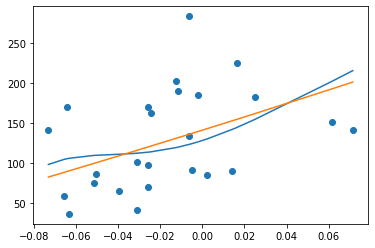

In [12]:
fig, ax = plt.subplots()
ax.plot(sorted(xv), simpred[argsort(xv.reshape(-1))])
ax.plot(sorted(xv), regpred[argsort(xv.reshape(-1))])
ax.scatter(xv, yv)

#### L1 Normalization Norm : Lasso Regression
$$
\begin{align*}
& \text{Objective : } J(\theta) = \frac{1}{2m}(y - X\theta)^T(y - X\theta) + \lambda \cdot ||\theta||_1 \\
& \text{Optimizer : }
\end{align*}
$$

In [13]:
RegularizedPoly = Pipeline([("Poly", PolynomialFeatures(degree=5)), ("L2 reg", Lasso(alpha=1e-2))])
RegularizedPoly.fit(xt, yt)
regpred = RegularizedPoly.predict(xv)
mean_absolute_error(yv, regpred)

51.045784873429

##### Plot

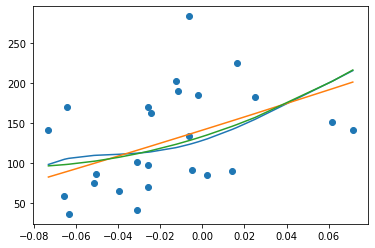

In [14]:
ax.plot(sorted(xv), regpred[argsort(xv.reshape(-1))])
fig